<a href="https://colab.research.google.com/github/keinengott/DeepLearning/blob/main/CS4390.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Verifying database is present

Mount google drive where image database is located

In [ ]:
# Use GPU
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.layers.normalization import BatchNormalization
from matplotlib import pyplot, image, transforms
from scipy import ndimage
import numpy as np
from os import listdir
from keras.models import Model
from matplotlib import image
import os
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import PIL
from PIL import Image

image = Image.open('drive/MyDrive/Emotions/zAnger/IMG_4272.JPG')
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(3088, 2320)


(2320, 3088, 3)


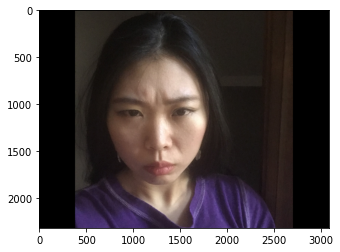

In [ ]:
print(np.asarray(image).shape)
imshow(np.asarray(image.rotate(-90)))

In [ ]:
loaded_images = list()
for filename in listdir('drive/MyDrive/Emotions/zAnger/'):
	img_data = image.imread('drive/MyDrive/Emotions/zAnger/' + filename)
	loaded_images.append(img_data)

# Image Database Size

In [ ]:
dataset = {}
traindir = "drive/MyDrive/Emotions/training/"
testdir = "drive/MyDrive/Emotions/test/"
valdir = "drive/MyDrive/Emotions/validation/"
for root, dirs, files in os.walk(traindir):
  for directory in dirs:
      dataset[directory[0:]] = len(os.listdir(traindir+directory))
  break
print(dataset)

{'neutral': 120, 'shocked': 120, 'happy': 120, 'concentrated': 103, 'anger': 120}


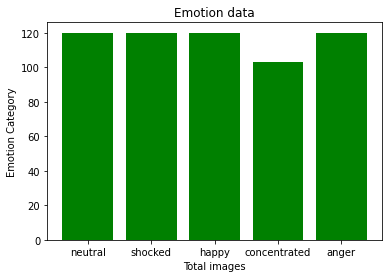

In [ ]:
plt.bar(dataset.keys(), dataset.values(), color="green")
plt.xlabel("Total images")
plt.ylabel("Emotion Category")
plt.title("Emotion data")
plt.show()

# Image Data Generator

In [ ]:
# Rescale all images by 1./150
my_generator = ImageDataGenerator(rescale=1./255)
#my_train_generator = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, shear_range=0.1, zoom_range=0.1, fill_mode='nearest') 1
#my_train_generator = ImageDataGenerator(rescale=1./255, width_shift_range=0.2, shear_range=0.2, zoom_range=0.2, fill_mode='nearest') 11
#my_train_generator = ImageDataGenerator(rescale=1./255, width_shift_range=5, height_shift_range=5,zoom_range=0.1, fill_mode='nearest') ##12
#my_train_generator = ImageDataGenerator(rescale=1./255, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, fill_mode='nearest')## 13
#my_train_generator = ImageDataGenerator(rescale=1./255,  shear_range=0.1, fill_mode='nearest')
my_train_generator = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, shear_range=0.1, zoom_range=0.1, fill_mode='nearest')

In [ ]:
train_generator = my_generator.flow_from_directory(traindir, target_size=(100, 100), batch_size=16, class_mode='categorical')
train_generator2 = my_train_generator.flow_from_directory(traindir, target_size=(100, 100), batch_size=16, class_mode='categorical')
valid_generator = my_generator.flow_from_directory(valdir, target_size=(100, 100), batch_size=16, class_mode='categorical')
test_generator = my_generator.flow_from_directory(testdir, target_size=(100, 100), batch_size=16, class_mode='categorical')

Found 583 images belonging to 5 classes.
Found 583 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


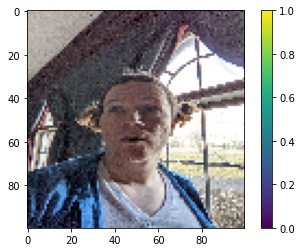

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 0. 1.]


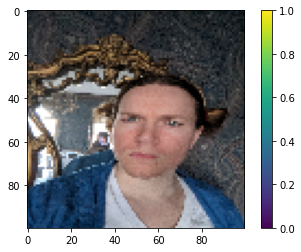

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1. 0. 0. 0.]


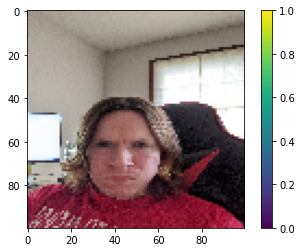

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0. 0. 0.]


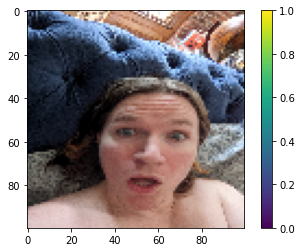

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 0. 1.]


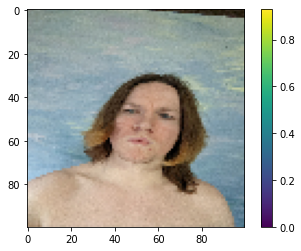

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1. 0. 0. 0.]


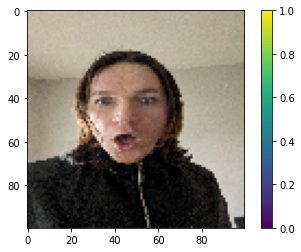

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 0. 1.]


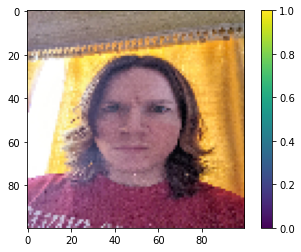

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1. 0. 0. 0.]


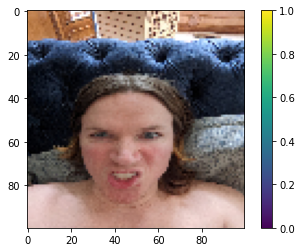

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0. 0. 0.]


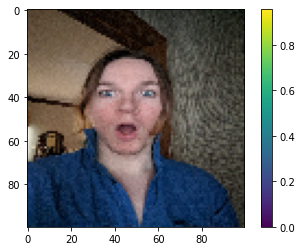

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 0. 1.]


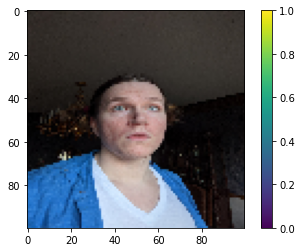

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 0. 1.]


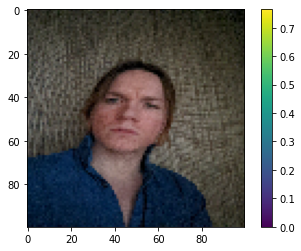

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1. 0. 0. 0.]


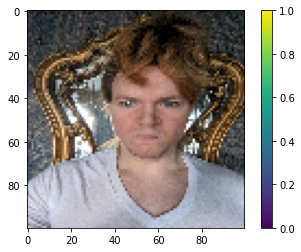

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0. 0. 0.]


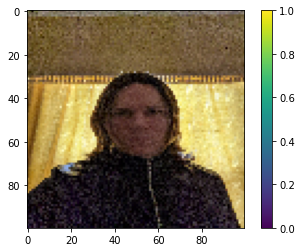

[1. 0. 0. 0. 0.]


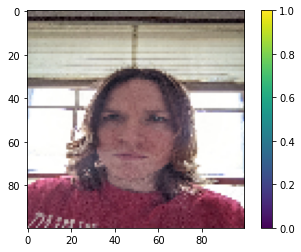

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1. 0. 0. 0.]


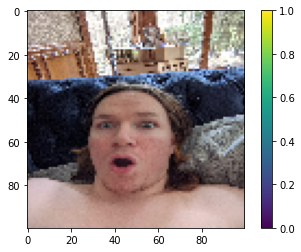

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 0. 1.]


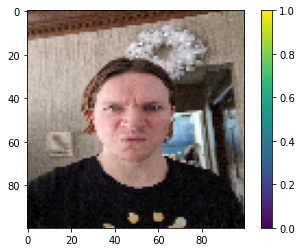

[1. 0. 0. 0. 0.]


In [ ]:
for my_batch in train_generator:
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        im = images[i]
        rotated = ndimage.rotate(im, 90)
        plt.imshow(rotated)
        plt.colorbar()
        plt.show()
        print(labels[i])
    break

# Overfitting Model

In [ ]:
model = Sequential()
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (100, 100, 3) ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add(BatchNormalization())
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 5, activation = 'relu' ) )
model.add( Dense( 5, activation = 'softmax' ) )
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 22, 22, 32)        18464     
_________________________________________________________________
batch_normalization_5 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 16)          4624      
_________________________________________________________________
flatten_5 (Flatten)          (None, 144)              

Compiling and Training

In [ ]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit( train_generator, validation_data=valid_generator, epochs = 50, batch_size = 64 )

In [ ]:
model.save("drive/MyDrive/Emotions/model_50")

INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model_50/assets


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Check learning curve

In [ ]:
model2 = Sequential()
model2.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (100, 100, 3) ) )
model2.add( MaxPool2D(4, 4) )
model2.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model2.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model2.add(BatchNormalization())
model2.add( MaxPool2D(4, 4) )
model2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model2.add( Flatten() )
model2.add( Dense( 5, activation = 'relu' ) )
model2.add( Dense( 5, activation = 'softmax' ) )
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 32)        18464     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 16)         

In [ ]:
model2.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history2 = model2.fit( train_generator, validation_data = valid_generator, epochs = 60, batch_size = 32 )

Epoch 1/60
19/19 [==============================] - 97s 5s/step - loss: 1.6292 - accuracy: 0.2202 - val_loss: 1.6095 - val_accuracy: 0.2100
Epoch 2/60
19/19 [==============================] - 93s 5s/step - loss: 1.5773 - accuracy: 0.2688 - val_loss: 1.6085 - val_accuracy: 0.2100
Epoch 3/60
19/19 [==============================] - 92s 5s/step - loss: 1.5630 - accuracy: 0.2691 - val_loss: 1.6088 - val_accuracy: 0.2000
Epoch 4/60
19/19 [==============================] - 92s 5s/step - loss: 1.5184 - accuracy: 0.2995 - val_loss: 1.6088 - val_accuracy: 0.1850
Epoch 5/60
19/19 [==============================] - 92s 5s/step - loss: 1.4937 - accuracy: 0.3219 - val_loss: 1.6070 - val_accuracy: 0.2150
Epoch 6/60
19/19 [==============================] - 92s 5s/step - loss: 1.4923 - accuracy: 0.3382 - val_loss: 1.6018 - val_accuracy: 0.2450
Epoch 7/60
19/19 [==============================] - 93s 5s/step - loss: 1.4613 - accuracy: 0.3192 - val_loss: 1.6045 - val_accuracy: 0.2250
Epoch 8/60
19/19 [==

In [ ]:
model2.save("drive/MyDrive/Emotions/model_64")

INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model_64/assets


In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model3 = Sequential()
model3.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (100, 100, 3) ) )
model3.add( MaxPool2D(4, 4) )
model3.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model3.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model3.add(BatchNormalization())
model3.add( MaxPool2D(4, 4) )
model3.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model3.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model3.add( Flatten() )
model3.add( Dense( 5, activation = 'relu' ) )
model3.add( Dense( 5, activation = 'softmax' ) )
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 20, 32)        18464     
_________________________________________________________________
batch_normalization_4 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 16)         

In [ ]:
model3.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history3 = model3.fit( train_generator, validation_data = valid_generator, epochs = 60, batch_size = 128 )

In [ ]:
model3.save("drive/MyDrive/Emotions/model3_56")

INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model3_56/assets


In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
a = ModelCheckpoint(filepath='drive/MyDrive/Emotions/model.4', monitor='val_loss', save_best_only=True)
b = EarlyStopping(monitor='val_accuracy', patience=10)
c = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=3)

In [ ]:
model4 = Sequential()
model4.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (100, 100, 3) ) )
model4.add( MaxPool2D(4, 4) )
model4.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model4.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model4.add(BatchNormalization())
model4.add( MaxPool2D(4, 4) )
model4.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model4.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model4.add( Flatten() )
model4.add( Dense( 5, activation = 'relu' ) )
model4.add( Dense( 5, activation = 'softmax' ) )
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 32)        18464     
_________________________________________________________________
batch_normalization_3 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 16)         

In [ ]:
model4.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history4 = model4.fit( train_generator, validation_data = valid_generator, epochs = 60, batch_size = 32, callbacks=[a,b,c] )

Epoch 1/60
19/19 [==============================] - 986s 51s/step - loss: 1.6316 - accuracy: 0.2082 - val_loss: 1.6135 - val_accuracy: 0.2000
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model.4/assets
Epoch 2/60
19/19 [==============================] - 97s 5s/step - loss: 1.5875 - accuracy: 0.2291 - val_loss: 1.6071 - val_accuracy: 0.1850
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model.4/assets
Epoch 3/60
19/19 [==============================] - 97s 5s/step - loss: 1.5639 - accuracy: 0.2459 - val_loss: 1.6032 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model.4/assets
Epoch 4/60
19/19 [==============================] - 97s 5s/step - loss: 1.5542 - accuracy: 0.2521 - val_loss: 1.5998 - val_accuracy: 0.2200
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model.4/assets
Epoch 5/60
19/19 [==============================] - 98s 5s/step - loss: 1.5261 - accuracy: 0.2725 - val_loss: 1.6121 - val_accuracy: 0.2400
Epoch 

In [ ]:
model4.save("drive/MyDrive/Emotions/model4_65")

INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model4_65/assets


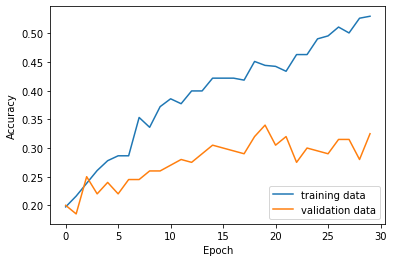

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model5 = Sequential()
model5.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (100, 100, 3) ) )
model5.add( MaxPool2D(3, 3) )
model5.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model5.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model5.add(BatchNormalization())
model5.add( MaxPool2D(3, 3) )
model5.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model5.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model5.add( Flatten() )
model5.add( Dense( 5, activation = 'relu' ) )
model5.add( Dense( 5, activation = 'softmax' ) )
model5.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_172 (Conv2D)          (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 30, 30, 32)        18464     
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_35 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 7, 7, 16)        

In [ ]:
model5.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history5 = model5.fit( train_generator, validation_data = valid_generator, epochs = 60, batch_size = 32, callbacks=[a,b,c] )

Epoch 1/60
19/19 [==============================] - 108s 6s/step - loss: 1.6279 - accuracy: 0.2002 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/60
19/19 [==============================] - 102s 5s/step - loss: 1.6019 - accuracy: 0.2044 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 3/60
19/19 [==============================] - 102s 5s/step - loss: 1.5915 - accuracy: 0.2825 - val_loss: 1.6091 - val_accuracy: 0.2500
Epoch 4/60
19/19 [==============================] - 100s 5s/step - loss: 1.5810 - accuracy: 0.2526 - val_loss: 1.6089 - val_accuracy: 0.2550
Epoch 5/60
19/19 [==============================] - 99s 5s/step - loss: 1.5679 - accuracy: 0.2437 - val_loss: 1.6081 - val_accuracy: 0.2250
Epoch 6/60
19/19 [==============================] - 99s 5s/step - loss: 1.5333 - accuracy: 0.3069 - val_loss: 1.6080 - val_accuracy: 0.2350
Epoch 7/60
19/19 [==============================] - 99s 5s/step - loss: 1.5286 - accuracy: 0.2923 - val_loss: 1.6020 - val_accuracy: 0.2450
Epoch 8/60
19/19

In [ ]:
model6 = Sequential()
model6.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (100, 100, 3) ) )
model6.add( MaxPool2D(4, 4) )
model6.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model6.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model6.add(BatchNormalization())
model6.add( MaxPool2D(4, 4) )
model6.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model6.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model6.add( Flatten() )
model6.add( Dense( 5, activation = 'relu' ) )
model6.add( Dense( 5, activation = 'softmax' ) )
model6.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 22, 22, 32)        18464     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 3, 3, 16)        

In [ ]:
model6.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history6 = model6.fit( train_generator2, validation_data = valid_generator, epochs = 60, batch_size = 32)

Epoch 1/60
19/19 [==============================] - 102s 5s/step - loss: 1.4894 - accuracy: 0.3453 - val_loss: 1.5757 - val_accuracy: 0.2700
Epoch 2/60
19/19 [==============================] - 94s 5s/step - loss: 1.4807 - accuracy: 0.3697 - val_loss: 1.6187 - val_accuracy: 0.2600
Epoch 3/60
19/19 [==============================] - 94s 5s/step - loss: 1.4600 - accuracy: 0.3460 - val_loss: 1.6046 - val_accuracy: 0.2650
Epoch 4/60
19/19 [==============================] - 93s 5s/step - loss: 1.4547 - accuracy: 0.3767 - val_loss: 1.6257 - val_accuracy: 0.2450
Epoch 5/60
19/19 [==============================] - 92s 5s/step - loss: 1.4403 - accuracy: 0.3732 - val_loss: 1.6518 - val_accuracy: 0.2500
Epoch 6/60
19/19 [==============================] - 93s 5s/step - loss: 1.3964 - accuracy: 0.3863 - val_loss: 1.6326 - val_accuracy: 0.2850
Epoch 7/60
19/19 [==============================] - 93s 5s/step - loss: 1.3820 - accuracy: 0.3878 - val_loss: 1.7198 - val_accuracy: 0.2050
Epoch 8/60
19/19 [=

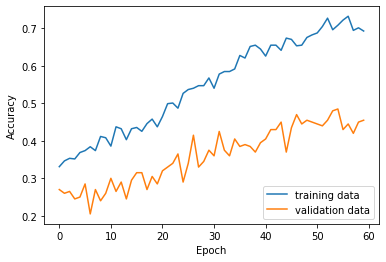

In [ ]:
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

#Effects of Regularization

In [ ]:
from tensorflow import keras
model = keras.models.load_model('drive/MyDrive/Emotions/model_64/')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 16)         

In [ ]:
model = Sequential()
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (100, 100, 3) ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add(BatchNormalization())
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 5, activation = 'relu' ) )
model.add( Dense( 5, activation = 'softmax' ) )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 16)         

In [ ]:
a = ModelCheckpoint(filepath='drive/MyDrive/Emotions/best', monitor='val_loss', save_best_only=True)
b = EarlyStopping(monitor='val_accuracy', patience=10)
c = ReduceLROnPlateau(monitor='val_loss',factor=0.9, patience=3)

In [ ]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])

In [ ]:
history = model.fit( train_generator2, validation_data = valid_generator, epochs = 100, batch_size = 16, callbacks=[a,b,c])

Epoch 1/100
19/19 [==============================] - 97s 5s/step - loss: 1.4461 - accuracy: 0.3396 - val_loss: 1.6272 - val_accuracy: 0.2450
Epoch 2/100
19/19 [==============================] - 99s 5s/step - loss: 1.3977 - accuracy: 0.3774 - val_loss: 1.5924 - val_accuracy: 0.2750
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model1/assets
Epoch 3/100
19/19 [==============================] - 98s 5s/step - loss: 1.4114 - accuracy: 0.3671 - val_loss: 1.5606 - val_accuracy: 0.2950
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model1/assets
Epoch 4/100
19/19 [==============================] - 97s 5s/step - loss: 1.3856 - accuracy: 0.4099 - val_loss: 1.5549 - val_accuracy: 0.2750
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model1/assets
Epoch 5/100
19/19 [==============================] - 96s 5s/step - loss: 1.3566 - accuracy: 0.3962 - val_loss: 1.5446 - val_accuracy: 0.3150
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model1/assets
Epoch 6

In [ ]:
model.save("drive/MyDrive/Emotions/model")

INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model/assets


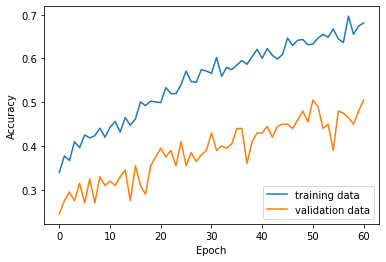

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
xmodel = keras.models.load_model('drive/MyDrive/Emotions/best')

In [ ]:
a = ModelCheckpoint(filepath='drive/MyDrive/Emotions/best', monitor='val_loss', save_best_only=True)
b = EarlyStopping(monitor='val_accuracy', patience=10)
xhistory = xmodel.fit( train_generator2, validation_data = valid_generator, epochs = 50, batch_size = 16, callbacks=[a,b])

Epoch 1/50
37/37 [==============================] - 102s 3s/step - loss: 0.7317 - accuracy: 0.7015 - val_loss: 1.2079 - val_accuracy: 0.6050
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/best/assets
Epoch 2/50
37/37 [==============================] - 99s 3s/step - loss: 0.6846 - accuracy: 0.7461 - val_loss: 1.2034 - val_accuracy: 0.6000
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/best/assets
Epoch 3/50
37/37 [==============================] - 98s 3s/step - loss: 0.6950 - accuracy: 0.7358 - val_loss: 1.2124 - val_accuracy: 0.5900
Epoch 4/50
37/37 [==============================] - 99s 3s/step - loss: 0.7035 - accuracy: 0.7358 - val_loss: 1.2282 - val_accuracy: 0.6000
Epoch 5/50
37/37 [==============================] - 98s 3s/step - loss: 0.6629 - accuracy: 0.7358 - val_loss: 1.2225 - val_accuracy: 0.5850
Epoch 6/50
37/37 [==============================] - 98s 3s/step - loss: 0.6800 - accuracy: 0.7256 - val_loss: 1.2213 - val_accuracy: 0.6050
Epoch 7/50
37/37 [=

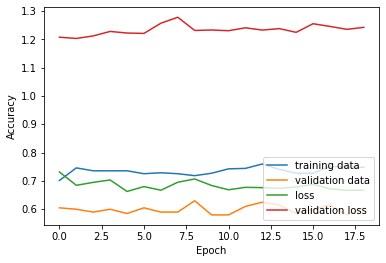

In [ ]:
plt.plot(xhistory.history['accuracy'])
plt.plot(xhistory.history['val_accuracy'])
plt.plot(xhistory.history['loss'])
plt.plot(xhistory.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data','loss', 'validation loss'], loc='lower right')
plt.show()

In [ ]:
xmodel.evaluate(test_generator)

13/13 [==============================] - 199s 16s/step - loss: 1.1047 - accuracy: 0.6050


[1.1047029495239258, 0.6050000190734863]

In [ ]:
ymodel = keras.models.load_model('drive/MyDrive/Emotions/model_64')
ymodel.evaluate(test_generator)

13/13 [==============================] - 24s 2s/step - loss: 2.2524 - accuracy: 0.6650


[2.2523961067199707, 0.6650000214576721]

In [ ]:
ymodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 16)         

In [ ]:
yhistory = ymodel.fit( train_generator, validation_data = valid_generator, epochs = 50, batch_size = 16, callbacks=[b])

Epoch 1/50
37/37 [==============================] - 93s 3s/step - loss: 0.1890 - accuracy: 0.9383 - val_loss: 2.4776 - val_accuracy: 0.5850
Epoch 2/50
37/37 [==============================] - 94s 3s/step - loss: 0.1208 - accuracy: 0.9571 - val_loss: 2.3645 - val_accuracy: 0.5950
Epoch 3/50
37/37 [==============================] - 93s 3s/step - loss: 0.0445 - accuracy: 0.9914 - val_loss: 2.5970 - val_accuracy: 0.6150
Epoch 4/50
37/37 [==============================] - 94s 3s/step - loss: 0.0304 - accuracy: 0.9931 - val_loss: 2.4454 - val_accuracy: 0.6100
Epoch 5/50
37/37 [==============================] - 93s 3s/step - loss: 0.0133 - accuracy: 0.9983 - val_loss: 2.4578 - val_accuracy: 0.6150
Epoch 6/50
37/37 [==============================] - 94s 3s/step - loss: 0.0115 - accuracy: 0.9983 - val_loss: 2.4879 - val_accuracy: 0.6350
Epoch 7/50
37/37 [==============================] - 94s 3s/step - loss: 0.0072 - accuracy: 0.9966 - val_loss: 2.4842 - val_accuracy: 0.6250
Epoch 8/50
37/37 [==

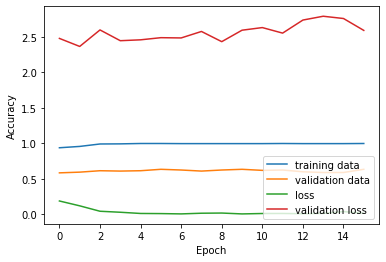

In [ ]:
plt.plot(yhistory.history['accuracy'])
plt.plot(yhistory.history['val_accuracy'])
plt.plot(yhistory.history['loss'])
plt.plot(yhistory.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data','loss', 'validation loss'], loc='lower right')
plt.show()

In [ ]:
a = ModelCheckpoint(filepath='drive/MyDrive/Emotions/model3', monitor='val_loss', save_best_only=True)
b = EarlyStopping(monitor='val_accuracy', patience=10)
c = ReduceLROnPlateau(monitor='val_loss',factor=0.9, patience=3)
xmodel = Sequential()
xmodel.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (100, 100, 3) ) )
xmodel.add( MaxPool2D(4, 4) )
xmodel.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
xmodel.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
xmodel.add(BatchNormalization())
xmodel.add( MaxPool2D(4, 4) )
xmodel.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
xmodel.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
xmodel.add( Flatten() )
xmodel.add( Dense( 5, activation = 'relu' ) )
xmodel.add( Dense( 5, activation = 'softmax' ) )
xmodel.summary()
xmodel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 22, 22, 32)        18464     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 3, 3, 16)         

In [ ]:

xhistory = xmodel.fit( train_generator2, validation_data = valid_generator, epochs = 100, batch_size = 16, callbacks=[a,b,c])

Epoch 1/100
19/19 [==============================] - 98s 5s/step - loss: 1.6314 - accuracy: 0.1676 - val_loss: 1.6092 - val_accuracy: 0.2000
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model3/assets
Epoch 2/100
19/19 [==============================] - 93s 5s/step - loss: 1.6099 - accuracy: 0.1996 - val_loss: 1.6085 - val_accuracy: 0.2000
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model3/assets
Epoch 3/100
19/19 [==============================] - 93s 5s/step - loss: 1.6083 - accuracy: 0.2060 - val_loss: 1.6086 - val_accuracy: 0.2000
Epoch 4/100
19/19 [==============================] - 93s 5s/step - loss: 1.6041 - accuracy: 0.2438 - val_loss: 1.6086 - val_accuracy: 0.2100
Epoch 5/100
19/19 [==============================] - 92s 5s/step - loss: 1.6056 - accuracy: 0.2380 - val_loss: 1.6083 - val_accuracy: 0.2000
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/model3/assets
Epoch 6/100
19/19 [==============================] - 92s 5s/step - loss: 1.6053

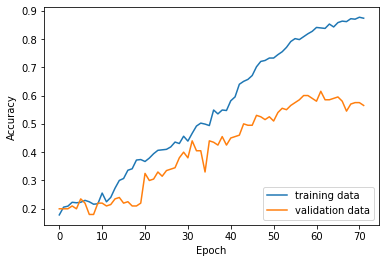

In [ ]:
plt.plot(xhistory.history['accuracy'])
plt.plot(xhistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

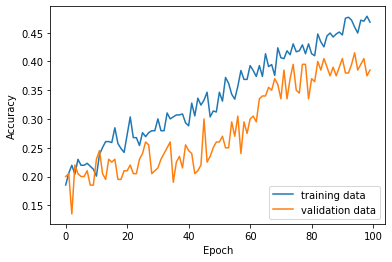

In [ ]:
plt.plot(xhistory.history['accuracy'])
plt.plot(xhistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

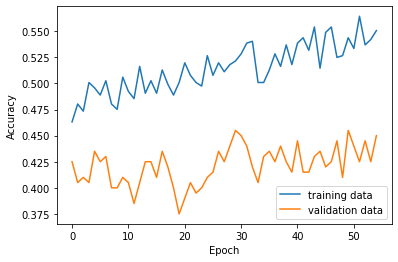

In [ ]:
plt.plot(xhistory.history['accuracy'])
plt.plot(xhistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
xmodel = keras.models.load_model('drive/MyDrive/Emotions/model')

In [ ]:
model = Sequential()
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (100, 100, 3) ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add(BatchNormalization())
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 5, activation = 'relu' ) )
model.add( Dense( 5, activation = 'softmax' ) )
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 32)        18464     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 16)        

In [ ]:
b = EarlyStopping(monitor='val_accuracy', patience=10)
c = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=4)
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])

In [ ]:
history = model.fit( train_generator, validation_data = valid_generator, epochs = 100, batch_size = 16, callbacks=[b,c])

Epoch 1/100
37/37 [==============================] - 92s 2s/step - loss: 1.6258 - accuracy: 0.2133 - val_loss: 1.6059 - val_accuracy: 0.2150
Epoch 2/100
37/37 [==============================] - 90s 2s/step - loss: 1.5804 - accuracy: 0.2264 - val_loss: 1.6077 - val_accuracy: 0.2050
Epoch 3/100
37/37 [==============================] - 90s 2s/step - loss: 1.5597 - accuracy: 0.2963 - val_loss: 1.6039 - val_accuracy: 0.2350
Epoch 4/100
37/37 [==============================] - 90s 2s/step - loss: 1.5560 - accuracy: 0.2819 - val_loss: 1.6079 - val_accuracy: 0.2100
Epoch 5/100
37/37 [==============================] - 90s 2s/step - loss: 1.5754 - accuracy: 0.2854 - val_loss: 1.5868 - val_accuracy: 0.2550
Epoch 6/100
37/37 [==============================] - 91s 2s/step - loss: 1.4988 - accuracy: 0.2731 - val_loss: 1.5829 - val_accuracy: 0.2200
Epoch 7/100
37/37 [==============================] - 90s 2s/step - loss: 1.4965 - accuracy: 0.3233 - val_loss: 1.6004 - val_accuracy: 0.2150
Epoch 8/100
3

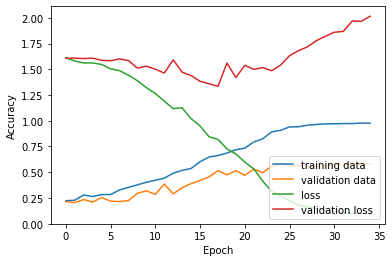

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data','loss', 'validation loss'], loc='lower right')
plt.show()

In [ ]:
model = Sequential()
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (100, 100, 3) ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add(Dropout(rate=.2))
model.add(BatchNormalization())
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 5, activation = 'relu' ) )
model.add( Dense( 5, activation = 'softmax' ) )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)         

In [ ]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])
history = model.fit( train_generator, validation_data = valid_generator, epochs = 100, batch_size = 16, callbacks=[b])

Epoch 1/100
37/37 [==============================] - 98s 3s/step - loss: 1.6114 - accuracy: 0.2128 - val_loss: 1.6096 - val_accuracy: 0.2150
Epoch 2/100
37/37 [==============================] - 94s 3s/step - loss: 1.6083 - accuracy: 0.2493 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 3/100
37/37 [==============================] - 92s 3s/step - loss: 1.6089 - accuracy: 0.1870 - val_loss: 1.6096 - val_accuracy: 0.2300
Epoch 4/100
37/37 [==============================] - 92s 3s/step - loss: 1.6071 - accuracy: 0.2161 - val_loss: 1.6093 - val_accuracy: 0.2200
Epoch 5/100
37/37 [==============================] - 92s 3s/step - loss: 1.6097 - accuracy: 0.2172 - val_loss: 1.6092 - val_accuracy: 0.2050
Epoch 6/100
37/37 [==============================] - 92s 3s/step - loss: 1.6081 - accuracy: 0.2471 - val_loss: 1.6093 - val_accuracy: 0.2050
Epoch 7/100
37/37 [==============================] - 92s 2s/step - loss: 1.6075 - accuracy: 0.2128 - val_loss: 1.6084 - val_accuracy: 0.2000
Epoch 8/100
3

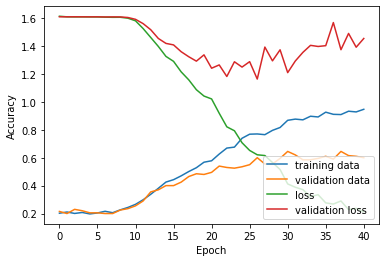

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data','loss', 'validation loss'], loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras import regularizers
model = Sequential()
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (100, 100, 3) ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add(BatchNormalization())
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 5,kernel_regularizer=regularizers.l2(0.001), activation = 'relu' ) )
model.add( Dense( 5, activation = 'softmax' ) )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 16)          4

In [ ]:
b = EarlyStopping(monitor='val_accuracy', patience=10)
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])
history = model.fit( train_generator, validation_data = valid_generator, epochs = 100, batch_size = 16, callbacks=[b])

Epoch 1/100
37/37 [==============================] - 411s 11s/step - loss: 1.6372 - accuracy: 0.2132 - val_loss: 1.6172 - val_accuracy: 0.1900
Epoch 2/100
37/37 [==============================] - 90s 2s/step - loss: 1.6144 - accuracy: 0.2247 - val_loss: 1.6173 - val_accuracy: 0.1850
Epoch 3/100
37/37 [==============================] - 90s 2s/step - loss: 1.6074 - accuracy: 0.2353 - val_loss: 1.6196 - val_accuracy: 0.2050
Epoch 4/100
37/37 [==============================] - 90s 2s/step - loss: 1.5926 - accuracy: 0.2723 - val_loss: 1.6141 - val_accuracy: 0.1900
Epoch 5/100
37/37 [==============================] - 90s 2s/step - loss: 1.5897 - accuracy: 0.2708 - val_loss: 1.6230 - val_accuracy: 0.2350
Epoch 6/100
37/37 [==============================] - 90s 2s/step - loss: 1.5661 - accuracy: 0.2851 - val_loss: 1.6393 - val_accuracy: 0.2450
Epoch 7/100
37/37 [==============================] - 90s 2s/step - loss: 1.5658 - accuracy: 0.2592 - val_loss: 1.6540 - val_accuracy: 0.1900
Epoch 8/100

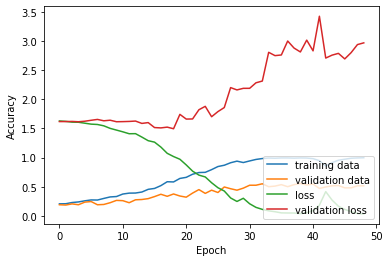

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data','loss', 'validation loss'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(test_generator)

13/13 [==============================] - 119s 10s/step - loss: 3.3807 - accuracy: 0.5550


[3.380668878555298, 0.5550000071525574]

# Using existing models


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet',include_top=False, input_shape=(100,100,3))

In [ ]:
vgg_train = model.predict(train_generator, verbose=1)
vgg_valid = model.predict(valid_generator, verbose=1)

13/13 [==============================] - 23s 2s/step


In [ ]:
print(vgg_train.shape, vgg_valid.shape)

(583, 3, 3, 512) (200, 3, 3, 512)


In [ ]:
x_train_new = np.reshape(vgg_train, (583, 3 * 3 * 512))
x_valid_new = np.reshape(vgg_valid, (200, 3 * 3 * 512))
print(x_train_new.shape)
print(x_valid_new.shape)

(583, 4608)
(200, 4608)


In [ ]:
#print(train_generator.labels)
#print(valid_generator.labels.shape)
print(x_train_new)
#model.summary()

[[0.55456215 0.         0.4164781  ... 0.         0.46490905 0.        ]
 [0.6835146  0.         1.8845572  ... 0.         0.53428614 0.        ]
 [0.3942832  0.         0.         ... 0.         0.9033706  0.        ]
 ...
 [0.7169573  0.         0.5487732  ... 0.         0.33155668 0.        ]
 [0.9460001  0.         1.3706255  ... 0.         0.8253292  0.        ]
 [0.         0.         0.581247   ... 0.         0.5418663  0.        ]]


In [ ]:
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(5, activation='softmax')(class1)
# define new model
xmodel = Model(inputs=model.inputs, outputs=output)
xmodel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])
history = xmodel.fit(train_generator, validation_data=valid_generator, epochs = 32, batch_size = 16)

Epoch 1/32
37/37 [==============================] - 92s 2s/step - loss: 4.2609 - accuracy: 0.1801 - val_loss: 1.7122 - val_accuracy: 0.2000
Epoch 2/32
37/37 [==============================] - 89s 2s/step - loss: 1.6375 - accuracy: 0.1811 - val_loss: 1.6098 - val_accuracy: 0.2000
Epoch 3/32
37/37 [==============================] - 89s 2s/step - loss: 1.6078 - accuracy: 0.2143 - val_loss: 1.6102 - val_accuracy: 0.2000
Epoch 4/32
37/37 [==============================] - 89s 2s/step - loss: 1.6085 - accuracy: 0.2020 - val_loss: 1.6105 - val_accuracy: 0.2000
Epoch 5/32
37/37 [==============================] - 89s 2s/step - loss: 1.6061 - accuracy: 0.2129 - val_loss: 1.6106 - val_accuracy: 0.2000
Epoch 6/32
37/37 [==============================] - 89s 2s/step - loss: 1.6095 - accuracy: 0.1771 - val_loss: 1.6108 - val_accuracy: 0.2000
Epoch 7/32
37/37 [==============================] - 89s 2s/step - loss: 1.6061 - accuracy: 0.1797 - val_loss: 1.6109 - val_accuracy: 0.2000
Epoch 8/32
37/37 [==

KeyboardInterrupt: ignored

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(100,100,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=5,activation="relu"))
model.add(Dense(units=5, activation="softmax"))

In [ ]:
b = EarlyStopping(monitor='val_accuracy', patience=10)
a = ModelCheckpoint(filepath='drive/MyDrive/Emotions/vgg', monitor='val_loss', save_best_only=True)
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])
history = model.fit( train_generator, validation_data = valid_generator, epochs = 100, batch_size = 16, callbacks=[a,b])

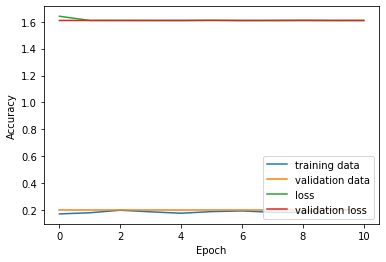

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data','loss', 'validation loss'], loc='lower right')
plt.show()

## ResNet50

In [ ]:
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.initializers import glorot_uniform

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
    X_shortcut = X
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)
    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)
    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
    X_shortcut = X
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
res_model_base = ResNet50(input_shape=(100, 100, 3))
head_model = res_model_base.output
head_model = Flatten()(head_model)
head_model= Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(head_model)
head_model= Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(head_model)
head_model = Dense( 5,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(head_model)

In [ ]:
model = Model(inputs=res_model_base.input, outputs=head_model)
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_12 (ZeroPadding2 (None, 106, 106, 3)  0           input_16[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 50, 64)   9472        zero_padding2d_12[0][0]          
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 50, 50, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
a = ModelCheckpoint(filepath='drive/MyDrive/Emotions/res', monitor='val_accuracy', save_best_only=True)
history = model.fit(train_generator,validation_data=valid_generator,epochs=100,batch_size = 16,verbose=1,callbacks=[a,b])

Epoch 1/100
37/37 [==============================] - 93s 3s/step - loss: 0.0876 - accuracy: 0.9657 - val_loss: 2.4707 - val_accuracy: 0.5200
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/res/assets
Epoch 2/100
37/37 [==============================] - 92s 2s/step - loss: 0.0572 - accuracy: 0.9846 - val_loss: 2.5539 - val_accuracy: 0.5450
INFO:tensorflow:Assets written to: drive/MyDrive/Emotions/res/assets
Epoch 3/100
37/37 [==============================] - 91s 2s/step - loss: 0.0140 - accuracy: 0.9931 - val_loss: 2.5914 - val_accuracy: 0.5450
Epoch 4/100
37/37 [==============================] - 90s 2s/step - loss: 0.0058 - accuracy: 0.9966 - val_loss: 2.5500 - val_accuracy: 0.5250
Epoch 5/100
37/37 [==============================] - 90s 2s/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 2.5397 - val_accuracy: 0.5350
Epoch 6/100
37/37 [==============================] - 91s 2s/step - loss: 0.0035 - accuracy: 0.9983 - val_loss: 2.6105 - val_accuracy: 0.5100
Epoch 7/100
37/3

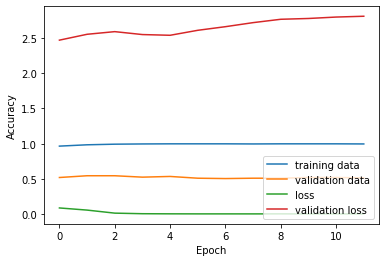

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data','loss', 'validation loss'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(test_generator)

13/13 [==============================] - 24s 2s/step - loss: 2.3864 - accuracy: 0.5600


[2.386352300643921, 0.5600000023841858]

## DenseNet

In [ ]:
# Implementation of DenseNet Architecture from Densely Connected Convolutional Networks paper from https://colab.research.google.com/drive/1v2p228o-_PRtecU0vYUXuGlG_VierqcP#scrollTo=wbkXMkrTgXiF&forceEdit=true&sandboxMode=true
def H(  inputs, num_filters , dropout_rate ):
    x = tf.keras.layers.BatchNormalization( epsilon=eps )( inputs )
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.ZeroPadding2D((1, 1))(x)
    x = tf.keras.layers.Conv2D(num_filters, kernel_size=(3, 3), use_bias=False , kernel_initializer='he_normal' )(x)
    x = tf.keras.layers.Dropout(rate=dropout_rate )(x)
    return x
def transition(inputs, num_filters , compression_factor , dropout_rate ):
    # compression_factor is the 'θ'
    x = tf.keras.layers.BatchNormalization( epsilon=eps )(inputs)
    x = tf.keras.layers.Activation('relu')(x)
    num_feature_maps = inputs.shape[1] # The value of 'm'

    x = tf.keras.layers.Conv2D( np.floor( compression_factor * num_feature_maps ).astype( np.int ) ,
                               kernel_size=(1, 1), use_bias=False, padding='same' , kernel_initializer='he_normal' , kernel_regularizer=tf.keras.regularizers.l2( 1e-4 ) )(x)
    x = tf.keras.layers.Dropout(rate=dropout_rate)(x)
    
    x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(x)
    return x
def dense_block( inputs, num_layers, num_filters, growth_rate , dropout_rate ):
    for i in range(num_layers): # num_layers is the value of 'l'
        conv_outputs = H(inputs, num_filters , dropout_rate )
        inputs = tf.keras.layers.Concatenate()([conv_outputs, inputs])
        num_filters += growth_rate # To increase the number of filters for each layer.
    return inputs, num_filters


In [ ]:
input_shape = ( 100 , 100 , 3 ) 
num_blocks = 3
num_layers_per_block = 4
growth_rate = 16
dropout_rate = 0.2
compress_factor = 0.5
eps = 1.1e-5

num_filters = 16

inputs = tf.keras.layers.Input( shape=input_shape )
x = tf.keras.layers.Conv2D( num_filters , kernel_size=( 3 , 3 ) , use_bias=False, kernel_initializer='he_normal' , kernel_regularizer=tf.keras.regularizers.l2( 1e-4 ) )( inputs )

for i in range( num_blocks ):
    x, num_filters = dense_block( x, num_layers_per_block , num_filters, growth_rate , dropout_rate )
    x = transition(x, num_filters , compress_factor , dropout_rate )

x = tf.keras.layers.GlobalAveragePooling2D()( x ) 
x = tf.keras.layers.Dense( 5 )( x )
outputs = tf.keras.layers.Activation( 'softmax' )( x )
model = tf.keras.models.Model( inputs , outputs )
model.compile( loss=tf.keras.losses.categorical_crossentropy ,optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) ,metrics=[ 'acc' ])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 98, 98, 16)   432         input_21[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 98, 98, 16)   64          conv2d_31[0][0]                  
__________________________________________________________________________________________________
activation_442 (Activation)     (None, 98, 98, 16)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
history = model.fit( train_generator, validation_data = valid_generator, epochs = 64, batch_size = 16, callbacks=[])

Epoch 1/64
37/37 [==============================] - 95s 2s/step - loss: 1.6862 - acc: 0.1677 - val_loss: 1.6363 - val_acc: 0.1400
Epoch 2/64
37/37 [==============================] - 90s 2s/step - loss: 1.6418 - acc: 0.2041 - val_loss: 1.6499 - val_acc: 0.2200
Epoch 3/64
37/37 [==============================] - 90s 2s/step - loss: 1.6357 - acc: 0.2186 - val_loss: 1.7402 - val_acc: 0.2000
Epoch 4/64
37/37 [==============================] - 90s 2s/step - loss: 1.6331 - acc: 0.2267 - val_loss: 1.7975 - val_acc: 0.2000
Epoch 5/64
37/37 [==============================] - 90s 2s/step - loss: 1.6107 - acc: 0.2506 - val_loss: 1.8659 - val_acc: 0.2000
Epoch 6/64
37/37 [==============================] - 90s 2s/step - loss: 1.6014 - acc: 0.2589 - val_loss: 1.8466 - val_acc: 0.2000
Epoch 7/64
37/37 [==============================] - 89s 2s/step - loss: 1.6207 - acc: 0.2844 - val_loss: 1.7856 - val_acc: 0.2050
Epoch 8/64
37/37 [==============================] - 90s 2s/step - loss: 1.6104 - acc: 0.24

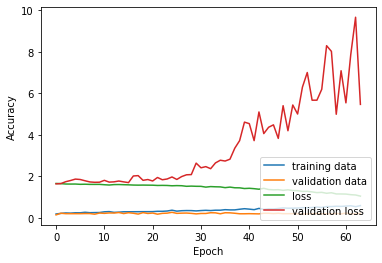

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data','loss', 'validation loss'], loc='lower right')
plt.show()

## VGG16

In [ ]:
IMG_SHAPE = (100, 100, 3)
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
VGG16_MODEL.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(5,activation='softmax')
vmodel = tf.keras.Sequential([
  VGG16_MODEL,
  global_average_layer,
  prediction_layer
])
vmodel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=["accuracy"])

In [ ]:
vhistory = vmodel.fit(train_generator,
                    epochs=100, 
                    batch_size = 16,
                    validation_data=valid_generator)

Epoch 1/100
37/37 [==============================] - 91s 2s/step - loss: 1.1066 - accuracy: 0.6278 - val_loss: 1.2873 - val_accuracy: 0.5000
Epoch 2/100
37/37 [==============================] - 88s 2s/step - loss: 1.0991 - accuracy: 0.6346 - val_loss: 1.2889 - val_accuracy: 0.5000
Epoch 3/100
37/37 [==============================] - 89s 2s/step - loss: 1.0909 - accuracy: 0.6381 - val_loss: 1.2795 - val_accuracy: 0.4900
Epoch 4/100
37/37 [==============================] - 88s 2s/step - loss: 1.0867 - accuracy: 0.6398 - val_loss: 1.2761 - val_accuracy: 0.5250
Epoch 5/100
37/37 [==============================] - 89s 2s/step - loss: 1.0732 - accuracy: 0.6329 - val_loss: 1.2751 - val_accuracy: 0.5050
Epoch 6/100
37/37 [==============================] - 89s 2s/step - loss: 1.0687 - accuracy: 0.6569 - val_loss: 1.2711 - val_accuracy: 0.5100
Epoch 7/100
37/37 [==============================] - 88s 2s/step - loss: 1.0636 - accuracy: 0.6364 - val_loss: 1.2680 - val_accuracy: 0.5000
Epoch 8/100
3

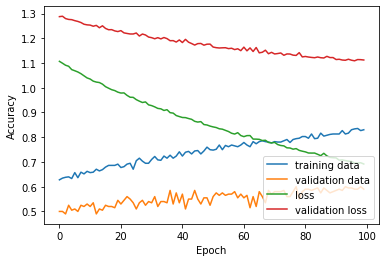

In [ ]:
plt.plot(vhistory.history['accuracy'])
plt.plot(vhistory.history['val_accuracy'])
plt.plot(vhistory.history['loss'])
plt.plot(vhistory.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data','loss', 'validation loss'], loc='lower right')
plt.show()